# Two-Sample Hypothesis Testing

## Introduction



It is common for researchers to perform studies to compare **two groups** and check if they behave differently. 

One example would be applying a treatment to one group while another is left untreated in order to see if the treatment had any effect.

In this lesson we will therefore look at:

- The theory behind two-sample hypothesis testing.

- How to test with *dependent* variables.

- How to test with *independent* variables. 

## Dependent Samples: A Bit of Theory


The main idea of two-sample testing for **dependent samples** is that we have two samples:

- Sample 1 (which is just one column) consisting of values *before* or *without* an intervention.

- Sample 2 (which is also just one column) consisting of values *after* or *with* an intervention.

And, crucially, the test is conducted in a row-based fashion, since the two groups both contain the same people or entities. As such, we are able to match each entry in the data with its **corresponding entry**. 

In other words, **for *each person* we compare a before and after.**

An example of such an intervention can be the administration of a new medicine. In the fist column we then have the blood pressure values *before* administering the drug and in the second column (second sample) we have the recorded values *after* administering the drug.

The goal is then to see if we can observe a statistical significant difference between the two samples. 

In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid") 

Let us look at an example. Suppose that Lukas owns a webshop. His customers can give a rating on a scale from 0 to 10. 

Now suppose that Lukas is considering whether faster delivery times may increase customer satisfaction. He takes a sample of 10 customers that gave already gave a rating. 

By means of experiment, to those customers he will offer a special, premium service of faster delivery. 

His goal is, of course, to see if this would increase customer satisfaction. 

Suppose, after doing the experiment, that the data looks like this:

| Customer | Rating Before | Rating After | Difference |
| --- | --- | --- | --- | 
| 1 | 7.1 | 7.2 | 0.1 |
| 2 | 6.9 | 8.2 | 1.2 |
| 3 | 7.2 | 6.9 | -0.3 |
| 4 | 6.8 | 7.4 | 0.6 |
| 5 | 7.4 | 7.9 | 0.5 |
| 6 | 8.1 | 8.3 | 0.2 |
| 7 | 7.3 | 7.2 | -0.1 |
| 8 | 6.9 | 7.1 | 0.2 |
| 9 | 7.9 | 6.8 | -1.1 |
| 10 | 6.3 | 6.7 |0.4  |

In [3]:
sample_1 = [7.1, 6.9, 7.2, 6.8, 7.4, 8.1, 7.3, 6.9, 7.9, 6.3]
sample_2 = [7.2, 8.2, 6.9, 7.4, 7.9, 8.3, 7.2, 7.1, 6.8, 6.7]

differences = list(map(lambda x,y: y-x, np.array(sample_1), np.array(sample_2)))
differences

[0.10000000000000053,
 1.299999999999999,
 -0.2999999999999998,
 0.6000000000000005,
 0.5,
 0.20000000000000107,
 -0.09999999999999964,
 0.1999999999999993,
 -1.1000000000000005,
 0.40000000000000036]

Let us now plot these two models of reality. 

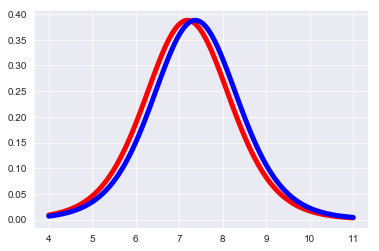

In [4]:
from scipy.stats import t

df = len(differences) - 1
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = t.stats(df, moments='mvsk')
x = np.linspace(4,11, 100)
ax.plot(x, t.pdf(x, df, loc = np.mean(sample_1)),'r-', lw=5) 
ax.plot(x, t.pdf(x, df, loc = np.mean(sample_2)),'b-', lw=5) 

On the basis of the models we built, it seems that the customers are in general happier when they receive faster delivery. 

However, is this difference large enough to be considered statistically significant?

### Hypothesis Test on the Mean of the Differences

We can determine statistical significance in this scenario by looking at whether difference in the mean is mean statistically different from 0. Thus, we have the following hypotheses:

*   H0: $\mu_{d} = 0$
*   H1: $\mu_{d} \neq 0,$

where the subscript $d$ denotes the mean of the difference between two samples.

That is, if the mean of the difference of the two samples is zero, there is no difference between the two samples. 

Visually, we would see something like this:

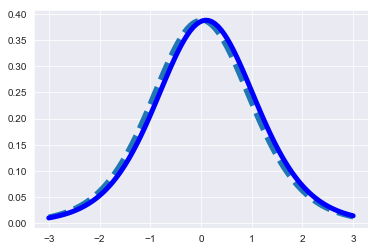

In [9]:
from scipy.stats import t

df = len(differences) - 1
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = t.stats(df, moments='mvsk')
x = np.linspace(-3,3, 100)
ax.plot(x, t.pdf(x, df, loc = 0),'--', lw=5) 
ax.plot(x, t.pdf(x, df, loc = 0.1),'b-', lw=5) 

If the mean is, however, statistically different from zero, there *is* a difference between the two samples.

Visually, we would see something like this:

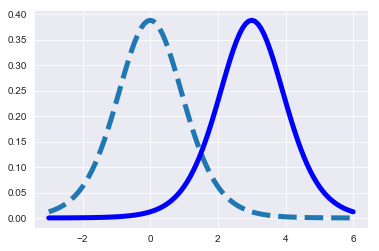

In [10]:
from scipy.stats import t

df = len(differences) - 1
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = t.stats(df, moments='mvsk')
x = np.linspace(-3,6, 100)
ax.plot(x, t.pdf(x, df, loc = 0),'--', lw=5) 
ax.plot(x, t.pdf(x, df, loc = 3),'b-', lw=5) 

Going back to our customer satisfaction example, we know that the difference between the two samples is 7.4 - 7.2 about 0.2. 

Obviously, there is always some random variation between any two samples so let's see if this is **statistically different** from 0. 

### T-score for Dependent Samples 

In order to see if we there really is a statistical significance, we can conduct a t-test. 

The t-score for a t-test like this one can be computed as follows:

$$t = \frac{\bar{X}_{d}}{\frac{s_{d}}{\sqrt{n}_{d}}},$$

where $s_{s}$ denotes the standard deviation of the sample differences, $\bar{X}_{d}$ the mean of the sample differences, and $n_{d}$ the sample size of the differences.

Recall that our data looked like this:

In [11]:
sample_1 = [7.1, 6.9, 7.2, 6.8, 7.4, 8.1, 7.3, 6.9, 7.9, 6.3]
sample_2 = [7.2, 8.2, 6.9, 7.4, 7.9, 8.3, 7.2, 7.1, 6.8, 6.7]

differences = list(map(lambda x,y: y-x, np.array(sample_1), np.array(sample_2)))

In [12]:
print(np.mean(differences))

0.18000000000000008


In [13]:
print(np.std(differences))

0.5946427498927401


Thus, we have that the t-test can be computed as follows:

$$t = \frac{0.18}{\frac{0.594}{\sqrt{10}}}.$$


Thus, we have that $t$:

In [14]:
t_value = (np.mean(differences)) / (np.std(differences) / np.sqrt(len(differences))) 
print(t_value)

0.957230167075914


Let's now plot these values (the t-scores and its negative equivalent) on a t-distribution plot.

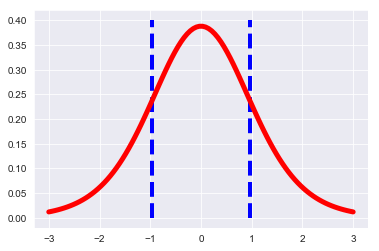

In [15]:
from scipy.stats import t

fig, ax = plt.subplots(1, 1)
df = 9
mean, var, skew, kurt = t.stats(df, moments='mvsk')
x = np.linspace(-3,3, 100)
plt.plot([t_value, t_value], [0, 0.4], 'k--', lw=4, color='b')
plt.plot([-t_value, -t_value], [0, 0.4], 'k--', lw=4, color='b')
ax.plot(x, t.pdf(x, df, loc = 0),'r-', lw=5)

Assuming a critical value alpha of 0.05, let us now compute the p-value.

In [18]:
p = t.cdf(t_value, df = 9) 
p = 1 - p

# Adjust for 2-sided
print(p*2) 

0.3634563722374462


As can be seen, the p-value is higher than 0.05, meaning that we cannot reject the null hypothesis.

Hence, it is unlikely that the new delivery service will lead to a *significantly* better costumer satisfaction.  

**Important**: This is essentially the same procedure as for 1-sample hypothesis testing. 

**Important:** This type of t-test is often called a **paired t-test**. 

### Example: Matched Pairs in Python



In this example we will look at a blood pressure study with 100 participants. Our participants all had their blood pressure measured before the beginning of the study and a month into the study. 

As such, we will compare the systolic blood pressure for the participants before and after.

In [19]:
import pandas as pd

In [20]:
blood_pressure = pd.read_csv('https://raw.githubusercontent.com/loukjsmalbil/datasets_ws/master/blood_pressure.csv')

In [21]:
blood_pressure.head()

,before,after
0,136.713072,92.432965
1,134.735618,105.022643
2,127.529115,82.242766
3,144.527126,93.607172
4,124.214720,103.212223


We will be using the scipy function ttest_rel. This function is used for hypothesis testing of dependent data.

In [22]:
from scipy.stats import ttest_rel

In [23]:
ttest_rel(blood_pressure.after, blood_pressure.before)

Ttest_relResult(statistic=-27.291841767560236, pvalue=7.303035069608042e-48)

Our result is a very small p-value. This means that we will reject the null hypothesis and that the therefore the samples are likely to be different.



Keep in mind that, since a matched pairs test, is equivalent to a one-sample test of the difference, we can also perform a one-sample test and get the exact same result.

In [24]:
from scipy.stats import ttest_1samp

ttest_1samp((blood_pressure.after) - (blood_pressure.before), popmean = 0)

Ttest_1sampResult(statistic=-27.291841767560236, pvalue=7.303035069608042e-48)

We can see that the p-value is identical since the tests are equivalent.

## Independent Samples: A Bit of Theory


## Independent Samples


The second type of two sample hypothesis tests are tests for independent samples. In this case, **we have two groups where we *cannot* match the rows to one another.** 

For example, we compare the effect of a certain medication on a sample of men and a sample of women. We then perform a hypothesis test to see whether **there is a significant difference in the way the medication affects the *groups*, not the average among individuals.**. 


Another example is an A/B test on a website. We can implement a number of changes in the UI of an e-commerce website. We will release version A to a sample of customers and version B to another sample. We can then test if there is a difference in revenue between the different samples.

![alt text](https://pbs.twimg.com/media/EBTy7SBXYAA0gol.jpg)

### Assumptions:

When looking at two independent samples, we need to check that a few assumptions hold. 

**The first assumption is obviously independence**. An example *of what could cause a dependence between two groups* is if we had a study on the impact of nutrition on health and we had a husband in one group and a wife in the other. 

While they are not the same person, they most likely live in the same household. Therefore, there are some things that they do that might be similar like sleep habits or commuting habits. As researchers, when this happens, we cannot be sure whether the intervention in our study was the main cause of the difference (or similarity) between the subjects.


**Secondly, we must also assume that the samples were drawn at random from a normally distributed population.**

### The main idea

In a paired t-test, the idea was to see if the mean difference between the two groups was close to 0. 

In an independent two-sample test, on the other hand, our hypothesis test (for a two-sided test) is a comparison of the two means:

*   H0: $\mu_{1} = \mu_{2}$
*   H1: $\mu_{1} \neq \mu_{2},$

where the subscripts $1$ and $2$ denote the first and the second sample, respectively. 



### Examples in Two Scenarios: Unequal and Equal Variances

Let us now look at two scenarios in which we may want to use a two-sample test:




1. A Two-Sample Test for which we **can assume Equal Variances**;


2. A Two-Sample Test for which we **cannot (or do not want to) assume Equal Variances.** 

We will start with the former. 

### Example 1: Equal Variances


If we know or can be relatively sure that the variances of the groups you draw samples form are equal, we can pass this knowledge as an argument to the ttest function.

In scipy, this means that we will be setting equal_var=True in our function.



The following is an example of a independent two-sample hypothesis test with equal variance. We will load a sample dataset of transaction amounts from an e-commerce website. 

We can assume that the values in both columns represent the amount of money that was spend. 

In [25]:
ab_test = pd.read_csv('https://raw.githubusercontent.com/loukjsmalbil/datasets_ws/master/ab_test.csv')
ab_test.head()

,a,b
0,0.27,13.61
1,6.08,21.53
2,13.74,9.23
3,9.70,5.36
4,7.00,12.90


Recall that the rows are not matched and the data is not stored in any order.


Here we make the assumption that the variances of both populations are equal based on prior knowledge of the data. Now we will test whether there is a significant difference between the website layouts.

In [26]:
from scipy.stats import ttest_ind

In [27]:
ttest_ind(ab_test['a'], ab_test['b'], equal_var=True)

Ttest_indResult(statistic=-2.637533181209767, pvalue=0.009713140852447347)

Our p-value is very small. This means that there is a significant difference between the two sample means.

### Example 2: Inequal Variances



When we cannot (or don't feel comfortable that we can) make the equal variance assumption with great certainty, we can use a more robust test instead. 

**Instead of using a test with an assumed variance (pooled variance), we use a test called Welch's t-test.**

This test is considered robust since it does not need to make as many assumptions about the data.



Let's use our A/B test data to perform a t-test that does not require the equal variance assumption:

In [28]:
ttest_ind(ab_test['a'], ab_test['b'], equal_var=False)

Ttest_indResult(statistic=-2.637533181209767, pvalue=0.009776243024828825)

In this case, the p-value slightly differs from the one we get with equal variances. However, since it is very small in this case as well, we will still reject the null hypothesis and conclude that there is a significant difference between the two sample means.

## Summary 




In this lesson, we have looked at how to compare 3 different kinds of two sample tests:


1. Paired t-test where our data was not independent;

2. Two-sample t-test for equal variances;

3. Two-sample t-test for unequal variances. 

# Appendix

For a more elaborate explanation of the paired t-test, please consult:

- http://www.statstutor.ac.uk/resources/uploaded/paired-t-test.pdf

For more on Welch's t-test:

- https://medium.com/@feraguilari/hypothesis-testing-welchs-t-test-for-difference-in-means-475e65f2aadb

For more information on the pooled standard deviation:
    
- For more information, follow this [link](https://support.minitab.com/en-us/minitab/19/help-and-how-to/statistics/basic-statistics/supporting-topics/data-concepts/what-is-the-pooled-standard-deviation/). 